<a href="https://colab.research.google.com/github/Trading-com-Dados/codigos_videos/blob/main/20220306_Compara%C3%A7%C3%A3o_de_Carteira_com_o_IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparação de uma carteira fictícia vs. IBOV

1. Instalando e importando bibliotecas

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 36.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

# 2. Importando dados

In [3]:
ativos = ['BPAN4.SA','VALE3.SA', 'WEGE3.SA','TOTS3.SA', 'BPAC11.SA',
            'KNRI11.SA','SMAL11.SA','AAPL34.SA','IVVB11.SA', 'TSLA34.SA',
	          'PETR4.SA', 'SUZB3.SA', 'JBSS3.SA', 'COCA34.SA']

In [4]:
inicio = '2020-06-01'
fim = '2022-03-06'

In [9]:
precos = yf.download(ativos, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  14 of 14 completed


In [10]:
precos.head()

,AAPL34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,IVVB11.SA,JBSS3.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,
2020-06-01,42.799938,12.160339,5.749840,40.883930,177.149994,19.508410,170.500000,16.523731,96.830002,37.996574,20.113430,30.191750,43.588085,20.620478
2020-06-02,41.642643,13.414209,6.650648,39.254982,173.500000,19.375156,171.190002,17.393400,101.050003,37.966923,20.418474,29.000000,43.588085,20.747643
2020-06-03,40.923046,14.430399,8.049775,39.280632,171.300003,18.300240,172.479996,17.450294,105.199997,37.680347,21.136810,28.100000,43.783916,20.835680
2020-06-04,40.685654,14.612295,8.586428,39.155582,171.979996,19.073112,171.000000,17.417786,105.029999,39.380062,21.343456,27.674999,45.415817,21.422602
2020-06-05,40.554592,14.609871,8.615176,39.344772,170.899994,18.611166,170.889999,17.962343,107.790001,37.848339,20.428314,27.599751,44.559067,21.681829


In [11]:
precos.columns

Index(['AAPL34.SA', 'BPAC11.SA', 'BPAN4.SA', 'COCA34.SA', 'IVVB11.SA',
       'JBSS3.SA', 'KNRI11.SA', 'PETR4.SA', 'SMAL11.SA', 'SUZB3.SA',
       'TOTS3.SA', 'TSLA34.SA', 'VALE3.SA', 'WEGE3.SA'],
      dtype='object')

# 3. Simulação da carteira fictícia

Criando um dicionário com as alocações que vamos fazer para cada ativo da nossa carteira

In [12]:
compras = {'BPAN4.SA': 1500, 'VALE3.SA': 1400, 'WEGE3.SA': 1300, 
           'TOTS3.SA': 1200, 'BPAC11.SA': 1100, 'KNRI11.SA': 1000, 
        	'SMAL11.SA': 800, 'AAPL34.SA': 700, 'IVVB11.SA': 500, 
		      'TSLA34.SA': 500, 'PETR4.SA': 1000, 'SUZB3.SA': 1000, 
		      'JBSS3.SA': 1000, 'COCA34.SA': 1000}


In [14]:
sum(compras.values())

14000

Preços dos ativos no primeiro dia do investimento

In [16]:
primeiro = precos.iloc[0]

Transformando dicionário de alocações em data frame

In [24]:
list(compras.keys())

['BPAN4.SA',
 'VALE3.SA',
 'WEGE3.SA',
 'TOTS3.SA',
 'BPAC11.SA',
 'KNRI11.SA',
 'SMAL11.SA',
 'AAPL34.SA',
 'IVVB11.SA',
 'TSLA34.SA',
 'PETR4.SA',
 'SUZB3.SA',
 'JBSS3.SA',
 'COCA34.SA']

In [26]:
compras_df = pd.Series(data = compras, index = list(compras.keys()))

Quantidade de papéis comprados de cada ativo

In [28]:
qtd_acoes = compras_df/primeiro

In [31]:
PL = precos*qtd_acoes

In [35]:
PL.head()

,AAPL34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,IVVB11.SA,JBSS3.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,,,,
2020-06-01,700.000000,1100.000000,1500.000000,1000.000000,500.000000,1000.000000,1000.000000,1000.000000,800.000000,1000.000000,1200.000000,500.000000,1400.000000,1300.000000,14000.000000
2020-06-02,681.072247,1213.422576,1734.999883,960.156761,489.698013,993.169454,1004.046935,1052.631512,834.865237,999.219623,1218.199432,480.263655,1400.000000,1308.016996,14369.762324
2020-06-03,669.303122,1305.345054,2099.999677,960.784147,483.488594,938.069275,1011.612878,1056.074699,869.152081,991.677488,1261.056535,465.358927,1406.289880,1313.567243,14831.779601
2020-06-04,665.420530,1321.799022,2239.999887,957.725498,485.407851,977.686699,1002.932551,1054.107296,867.747572,1036.410853,1273.385369,458.320562,1458.704688,1350.569208,15150.217588
2020-06-05,663.276997,1321.579730,2247.499707,962.352987,482.359582,954.007347,1002.287386,1087.063386,890.550440,996.098719,1218.786503,457.074381,1431.186831,1366.911995,15081.035992


In [36]:
PL.tail()

,AAPL34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,IVVB11.SA,JBSS3.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,,,,
2022-02-24,1363.202878,2356.430879,2642.682142,1253.793313,671.747130,1870.987996,762.463343,2020.729999,921.202089,1419.338484,1958.094646,2136.345224,2811.685826,1848.453765,24037.157715
2022-02-25,1383.483246,2298.537813,2611.376954,1316.898837,692.915632,1839.719398,779.178921,2057.646637,917.401622,1449.341173,1971.816793,2136.345224,2963.929197,1853.497291,24272.088739
2022-03-02,1382.829149,2275.018712,2613.985782,1296.108310,687.552962,1873.550954,772.785892,2098.194269,925.415677,1447.498909,1989.715236,2320.998218,3200.645350,1907.084822,24791.384243
2022-03-03,1358.950500,2231.598913,2611.376954,1273.850179,674.005112,1839.719398,772.492708,2072.171303,929.216145,1414.074831,1995.681536,2186.027671,3202.251147,1968.237581,24529.653979
2022-03-04,1345.702858,2178.228678,2600.941892,1284.612321,674.851861,1836.643927,774.017602,2071.565984,914.592542,1508.820275,1937.809683,2186.027671,3275.161117,1986.520436,24575.496845


In [34]:
PL['PL Total'] = PL.sum(axis = 1)

# 4. Obtendo dados do IBOV

In [37]:
ibov = yf.download('^BVSP', start = inicio, end =  fim)

[*********************100%***********************]  1 of 1 completed


In [39]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

In [40]:
ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1, inplace = True)

In [41]:
ibov.head()

,IBOV
Date,
2020-06-01,88620.0
2020-06-02,91046.0
2020-06-03,93002.0
2020-06-04,93829.0
2020-06-05,94637.0


Juntando tudo num dataframe só

In [42]:
consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [43]:
consolidado.head()

,IBOV,AAPL34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,IVVB11.SA,JBSS3.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,,,,,
2020-06-01,88620.0,700.000000,1100.000000,1500.000000,1000.000000,500.000000,1000.000000,1000.000000,1000.000000,800.000000,1000.000000,1200.000000,500.000000,1400.000000,1300.000000,14000.000000
2020-06-02,91046.0,681.072247,1213.422576,1734.999883,960.156761,489.698013,993.169454,1004.046935,1052.631512,834.865237,999.219623,1218.199432,480.263655,1400.000000,1308.016996,14369.762324
2020-06-03,93002.0,669.303122,1305.345054,2099.999677,960.784147,483.488594,938.069275,1011.612878,1056.074699,869.152081,991.677488,1261.056535,465.358927,1406.289880,1313.567243,14831.779601
2020-06-04,93829.0,665.420530,1321.799022,2239.999887,957.725498,485.407851,977.686699,1002.932551,1054.107296,867.747572,1036.410853,1273.385369,458.320562,1458.704688,1350.569208,15150.217588
2020-06-05,94637.0,663.276997,1321.579730,2247.499707,962.352987,482.359582,954.007347,1002.287386,1087.063386,890.550440,996.098719,1218.786503,457.074381,1431.186831,1366.911995,15081.035992


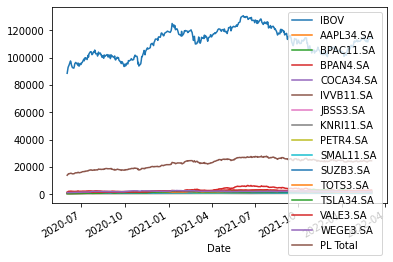

In [44]:
consolidado.plot()

# 5. Comparando nossa carteira com o IBOV

Normalizando os dados para ajustar a escala

In [45]:
consolidado_adj = consolidado/consolidado.iloc[0]

In [46]:
consolidado_adj.head()

,IBOV,AAPL34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,IVVB11.SA,JBSS3.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,,,,,
2020-06-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-06-02,1.027375,0.972960,1.103111,1.156667,0.960157,0.979396,0.993169,1.004047,1.052632,1.043582,0.999220,1.015166,0.960527,1.000000,1.006167,1.026412
2020-06-03,1.049447,0.956147,1.186677,1.400000,0.960784,0.966977,0.938069,1.011613,1.056075,1.086440,0.991677,1.050880,0.930718,1.004493,1.010436,1.059413
2020-06-04,1.058779,0.950601,1.201635,1.493333,0.957725,0.970816,0.977687,1.002933,1.054107,1.084684,1.036411,1.061154,0.916641,1.041932,1.038899,1.082158
2020-06-05,1.067897,0.947539,1.201436,1.498333,0.962353,0.964719,0.954007,1.002287,1.087063,1.113188,0.996099,1.015655,0.914149,1.022276,1.051471,1.077217


In [47]:
consolidado_adj.tail()

,IBOV,AAPL34.SA,BPAC11.SA,BPAN4.SA,COCA34.SA,IVVB11.SA,JBSS3.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,SUZB3.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,,,,,,
2022-02-24,1.259219,1.947433,2.142210,1.761788,1.253793,1.343494,1.870988,0.762463,2.020730,1.151503,1.419338,1.631746,4.272690,2.008347,1.421888,1.716940
2022-02-25,1.276710,1.976405,2.089580,1.740918,1.316899,1.385831,1.839719,0.779179,2.057647,1.146752,1.449341,1.643181,4.272690,2.117092,1.425767,1.733721
2022-03-02,1.299639,1.975470,2.068199,1.742657,1.296108,1.375106,1.873551,0.772786,2.098194,1.156770,1.447499,1.658096,4.641996,2.286175,1.466988,1.770813
2022-03-03,1.299549,1.941358,2.028726,1.740918,1.273850,1.348010,1.839719,0.772493,2.072171,1.161520,1.414075,1.663068,4.372055,2.287322,1.514029,1.752118
2022-03-04,1.291738,1.922433,1.980208,1.733961,1.284612,1.349704,1.836644,0.774018,2.071566,1.143241,1.508820,1.614841,4.372055,2.339401,1.528093,1.755393


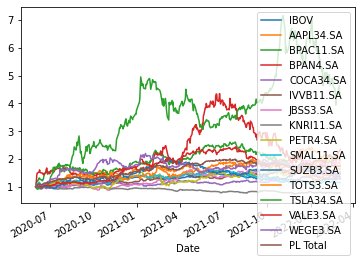

In [48]:
consolidado_adj.plot()

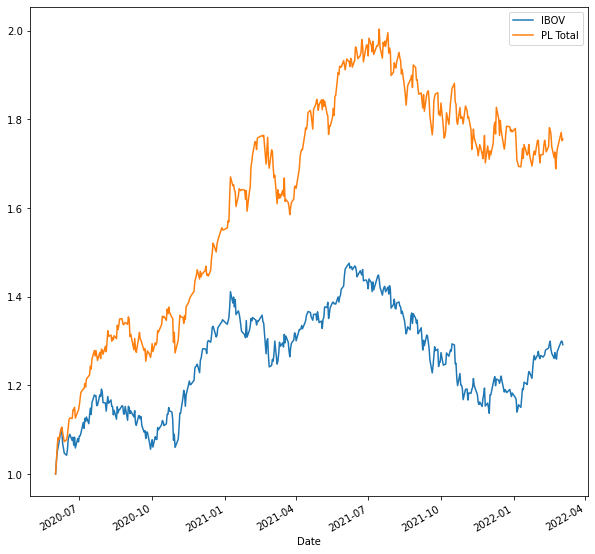

In [49]:
consolidado_adj[['IBOV', 'PL Total']].plot(figsize = (10,10));